In [1]:
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns # data visualization and statistical graphics
import sklearn.metrics as metrics # metrics for model evaluation
from scipy import stats # statistics

/Users/edwardamoah/Documents/GitHub/FloralArea/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
files = os.listdir('/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1')
files = ['/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/' + file for file in files]

In [3]:
area = []
mask = []
filesnames = []
for file in files:
    try:
        print(file)
        url = 'http://localhost:8000/estimate_area/flower/0.4'
        file = {'uploaded_file': open(file, 'rb')}
        response = requests.post(url, files=file)
        response = response.json()
        area.append(response['area'])
        mask.append(response['mask'])
        filesnames.append(file)
    except:
        area.append(np.nan)
        mask.append(np.nan)
        filesnames.append(file)
    
    #print(response.json())

/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_172530114_80cm_F6_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_173554009_80cm_F11_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175708911_100cm_F23_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175352365_100cm_F21_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_174000188_80cm_F13_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175405036_80cm_F21_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175033319_60cm_F18_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_

In [4]:
filename= [file.split('/')[-1] for file in files]
df = pd.DataFrame({'area': area, 'mask': mask, 'images': filename})
#df.dropna(inplace=True)

In [5]:
df[df['area'].isnull()]

,area,mask,images


In [6]:
df1 = pd.read_csv('/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/floralarea_experiment_1 - floralarea.csv')
df.dropna(inplace=True)
df2 = df1[['images', 'flower_number','distance', 'flower_color','imagej_area', 'morphology']].merge(df, on='images')
df2

,images,flower_number,distance,flower_color,imagej_area,morphology,area,mask
0,PXL_20240214_172530114_80cm_F6_.jpg,F6,80cm,T1,7.953,C1,0.000000,api/data/output/flower_0.4_e163a74c-a6a2-4dd5-...
1,PXL_20240214_173554009_80cm_F11_.jpg,F11,80cm,T5,0.522,C3,0.642129,api/data/output/flower_0.4_cf3c88a8-2680-4fce-...
2,PXL_20240214_175708911_100cm_F23_.jpg,F23,100cm,T3,5.567,C2,6.557259,api/data/output/flower_0.4_6b74e5f3-0d2b-4456-...
3,PXL_20240214_175352365_100cm_F21_.jpg,F21,100cm,T2,3.053,C2,3.965035,api/data/output/flower_0.4_8795b233-a853-4d89-...
4,PXL_20240214_174000188_80cm_F13_.jpg,F13,80cm,T4,20.396,C3,22.130003,api/data/output/flower_0.4_897c1e7a-ea80-4c9c-...
...,...,...,...,...,...,...,...,...
70,PXL_20240214_172357833_80cm_F5_.jpg,F5,80cm,T1,2.921,C1,2.117485,api/data/output/flower_0.4_9a7d178f-e2b9-4cc1-...
71,PXL_20240214_173607901_60cm_F11_.jpg,F11,60cm,T5,0.548,C3,0.585095,api/data/output/flower_0.4_289cb899-7553-4e63-...
72,PXL_20240214_174741393_100cm_F16_.jpg,F16,100cm,T3,8.464,C2,6.569956,api/data/output/flower_0.4_4235bed7-2885-4ac4-...
73,PXL_20240214_172516412_100cm_F6_.jpg,F6,100cm,T1,6.500,C1,0.000000,api/data/output/flower_0.4_a6341cc7-e664-4809-...


In [7]:
# Evaluation 
df = df2

In [8]:
# function to convert inches square to cm square
def convert_inch_to_cm(inch):
    cm = inch * 6.4516
    return cm


In [9]:
# convert inches area to meters
df['area'] = df['area'].apply(convert_inch_to_cm)
df['imagej_area'] = df['imagej_area'].apply(convert_inch_to_cm)

In [10]:
# filtere columns 
data = df[['area','flower_number','distance','imagej_area','flower_color','morphology']]

# Q4: Other than the method above. What other method can be used to filter columns in a DataFrame?
# Q5: What command is used to drop rows with missing values in a DataFrame?


In [11]:
# describe (data exploration after cleaning)
data.describe()

# Q4: What command is used to get the summary statistics of a DataFrame?

,area,imagej_area
count,75.000000,75.000000
mean,70.936464,68.018101
std,88.822698,79.437059
min,0.000000,2.883865
25%,16.817731,18.767704
50%,38.811200,38.670890
75%,94.402226,90.590141
max,391.864988,359.605732


In [12]:
############### data visualization #############

In [13]:
# filter data by distance
data_60 = data.query('distance == "60cm"')
data_80 = data.query('distance == "80cm"')
data_100 = data.query('distance == "100cm"')

In [14]:
# Fit a polynomial regression line
coefficients_60 = np.polyfit(data_60['imagej_area'], data_60['area'], 1)
poly_line_60 = np.poly1d(coefficients_60)

coefficients_80 = np.polyfit(data_80['imagej_area'], data_80['area'], 1)
poly_line_80 = np.poly1d(coefficients_80)

coefficients_100 = np.polyfit(data_100['imagej_area'], data_100['area'], 1)
poly_line_100 = np.poly1d(coefficients_100)

coefficients = np.polyfit(data['imagej_area'], data['area'], 1)
poly_line = np.poly1d(coefficients)

Text(0.3, 0.75, '(n=75),\ny = 1.11x + -4.44, \nr-square: 0.98')

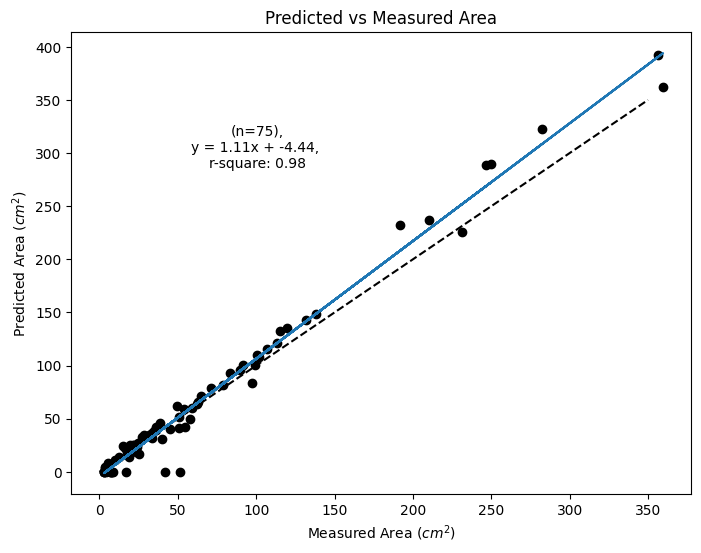

In [15]:
# set the size of the plot
plt.figure(figsize=(8, 6))
plt.xlabel('Measured Area $\\left( cm^2 \\right)$')
plt.ylabel('Predicted Area $\\left( cm^2 \\right)$')
plt.title('Predicted vs Measured Area')


plt.plot(data['imagej_area'], data['area'], 'o', color='black') # plot the data
plt.plot([0,50,100,150,200,250,300,350], [0,50,100,150,200,250,300,350], 'k--')
#plt.plot(data_60['imagej_area'], poly_line_60(data_60['imagej_area']), color='red')
#plt.plot(data_80['imagej_area'], poly_line_80(data_80['imagej_area']), color='green')
#plt.plot(data_100['imagej_area'], poly_line_100(data_100['imagej_area']), color='blue')
plt.plot(data['imagej_area'], poly_line(data['imagej_area']))


'''
# Add equation of the line to the plot
equation = f"y = {coefficients_60[0]:.2f}x + {coefficients_60[1]:.2f}"
r2 = metrics.r2_score(data_60['area'], poly_line_60(data_60['imagej_area']))
text_60 = f"60cm (n={len(data_60)}) : {equation}, R2: {r2:.2f}"
plt.text(0.3, 0.95, text_60, ha='center', va='center', transform=plt.gca().transAxes, color='red')

# Add equation of the line to the plot
equation = f"y = {coefficients_80[0]:.2f}x + {coefficients_80[1]:.2f}"
r2 = metrics.r2_score(data_80['area'], poly_line_80(data_80['imagej_area']))
text_80 = f"80cm (n={len(data_80)}) : {equation}, R2: {r2:.2f}"
plt.text(0.3, 0.85, text_80, ha='center', va='center', transform=plt.gca().transAxes, color='green')

# Add equation of the line to the plot
equation = f"y = {coefficients_100[0]:.2f}x + {coefficients_100[1]:.2f}"
r2 = metrics.r2_score(data_100['area'], poly_line_100(data_100['imagej_area']))
text_100 = f"100cm (n={len(data_100)}) : {equation}, R2: {r2:.2f}"
plt.text(0.3, 0.75, text_100, ha='center', va='center', transform=plt.gca().transAxes, color='blue')
'''

# Add equation of the line to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r2 = metrics.r2_score(data['area'], poly_line(data['imagej_area']))
text_all = f"(n={len(data)}),\n{equation}, \nr-square: {r2:.2f}"
plt.text(0.3, 0.75, text_all, ha='center', va='center', transform=plt.gca().transAxes, color='black')


In [16]:
# absolute difference
data['abs_diff'] = abs(data['imagej_area'] - data['area'])
data['diff'] = data['imagej_area'] - data['area']

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_74021/2060323613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abs_diff'] = abs(data['imagej_area'] - data['area'])


In [17]:
# categorize data by flwoer color
data[["flower_color", "imagej_area", "area", "abs_diff", "diff"]].groupby("flower_color").count() 
# you can use count, mean, sum, etc.

,imagej_area,area,abs_diff,diff
flower_color,,,,
T1,18,18,18,18
T2,15,15,15,15
T3,21,21,21,21
T4,17,17,17,17
T5,4,4,4,4


In [18]:
# filter data by flower color
data_t1 = data.query('flower_color == "T1"')
data_t2 = data.query('flower_color == "T2"')
data_t3 = data.query('flower_color == "T3"')
data_t4 = data.query('flower_color == "T4"')
data_t5 = data.query('flower_color == "T5"')

([<matplotlib.axis.XTick at 0x17efa43d0>,
 [Text(0, 0, 'T1(n=18)'),
  Text(1, 0, 'T2(n=15)'),
  Text(2, 0, 'T3(n=21)'),
  Text(3, 0, 'T4(n=17)'),
  Text(4, 0, 'T5(n=4)')])

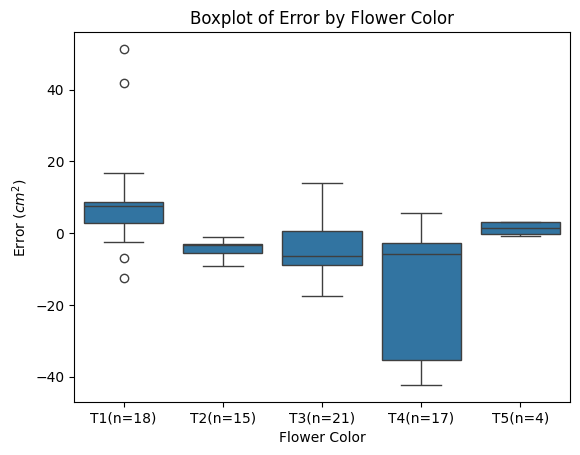

In [19]:
sns.boxplot(x='flower_color', y='diff', data=data, order=['T1', 'T2', 'T3', 'T4', 'T5'])
plt.title('Boxplot of Error by Flower Color')
plt.xlabel('Flower Color')
plt.ylabel('Error $\\left( cm^2 \\right)$')
plt.xticks([0,1,2,3,4], [f'T1(n={len(data_t1)})', f'T2(n={len(data_t2)})', f'T3(n={len(data_t3)})', f'T4(n={len(data_t4)})', f'T5(n={len(data_t5)})'])

In [20]:
#https://www.statology.org/null-hypothesis-for-anova/

# Read about anova testing above

# Perform ANOVA test
result = stats.f_oneway(data[data['flower_color'] == 'T1']['diff'],
                        data[data['flower_color'] == 'T2']['diff'],
                        data[data['flower_color'] == 'T3']['diff'],
                        data[data['flower_color'] == 'T4']['diff'],
                        data[data['flower_color'] == 'T5']['diff'])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-value: 8.42008698727567
p-value: 1.3225563558685649e-05


In [21]:
## categorize by distance

In [22]:
data[["distance", "imagej_area", "area", "abs_diff", "diff"]].groupby("distance").count()

,imagej_area,area,abs_diff,diff
distance,,,,
100cm,27,27,27,27
60cm,22,22,22,22
80cm,23,23,23,23
90cm,3,3,3,3


In [23]:
# filter data for distance anlysis
data_60 = data.query('distance == "60cm"')
data_80 = data.query('distance == "80cm"')
data_100 = data.query('distance == "100cm"')

([<matplotlib.axis.XTick at 0x17f08d880>,
 [Text(0, 0, '60cm (n=22)'),
  Text(1, 0, '80cm (n=23)'),
  Text(2, 0, '100cm (n=27)')])

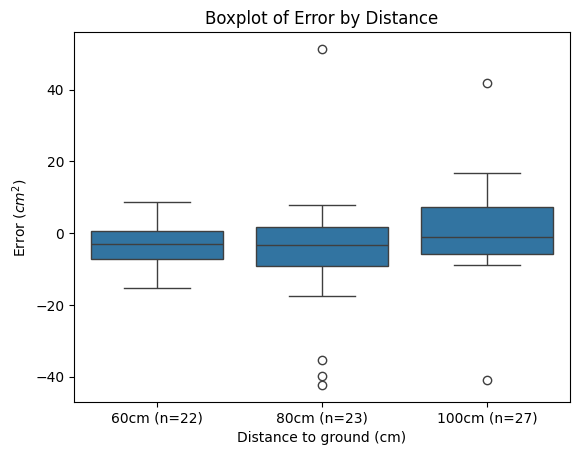

In [24]:
sns.boxplot(x='distance', y='diff', data=data, order=['60cm', '80cm', '100cm'])
plt.title('Boxplot of Error by Distance')
plt.xlabel('Distance to ground (cm)')
plt.ylabel('Error $\\left( cm^2 \\right)$')
plt.xticks([0,1,2], [f'60cm (n={len(data_60)})', f'80cm (n={len(data_80)})', f'100cm (n={len(data_100)})'])

In [25]:
#https://www.statology.org/null-hypothesis-for-anova/

# Read about anova testing above

# Perform ANOVA test
result = stats.f_oneway(data_60["diff"], data_80["diff"], data_100["diff"])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-value: 1.3090110948018263
p-value: 0.2767091216716744


In [26]:
### categorize by morphology

In [27]:
data[["morphology", "imagej_area", "area", "abs_diff", "diff"]].groupby("morphology").count()

,imagej_area,area,abs_diff,diff
morphology,,,,
C1,18,18,18,18
C2,36,36,36,36
C3,21,21,21,21


In [28]:
# filter data for morphology analysis
data_c1 = data.query('morphology == "C1"')
data_c2 = data.query('morphology == "C2"')
data_c3 = data.query('morphology == "C3"')

([<matplotlib.axis.XTick at 0x17f130340>,
 [Text(0, 0, 'C1 (n=18)'), Text(1, 0, 'C2 (n=36)'), Text(2, 0, 'C3 (n=21)')])

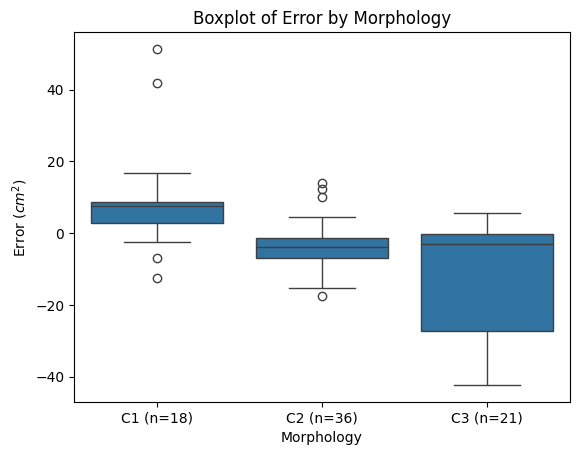

In [29]:
sns.boxplot(x='morphology', y='diff', data=data, order=['C1', 'C2', 'C3'])
plt.title('Boxplot of Error by Morphology')
plt.xlabel('Morphology')
plt.ylabel('Error $\\left( cm^2 \\right)$')
plt.xticks([0,1,2], [f'C1 (n={len(data_c1)})', f'C2 (n={len(data_c2)})', f'C3 (n={len(data_c3)})'])

In [30]:
#https://www.statology.org/null-hypothesis-for-anova/

# Read about anova testing above

# Perform ANOVA test
result = stats.f_oneway(data_c1["diff"], data_c2["diff"], data_c3["diff"])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-value:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-value: 13.38485598312751
p-value: 1.141598868496954e-05


In [31]:
########### further further evaluation ###########

# check if there is any statistical difference between the predicted floral area by distance (60cm, 80cm, 100cm)

In [32]:
# remove flowers that does not have measurements in 60, 80, and 100 cm
data1= data[data['flower_number'] != 'F23']
data1 = data1[data1['distance'] != '90cm']
data1.head()

,area,flower_number,distance,imagej_area,flower_color,morphology,abs_diff,diff
0,0.000000,F6,80cm,51.309575,T1,C1,51.309575,51.309575
1,4.142760,F11,80cm,3.367735,T5,C3,0.775025,-0.775025
3,25.580820,F21,100cm,19.696735,T2,C2,5.884085,-5.884085
4,142.773928,F13,80cm,131.586834,T4,C3,11.187094,-11.187094
5,23.594120,F21,80cm,20.451572,T2,C2,3.142548,-3.142548


<Axes: ylabel='diff'>

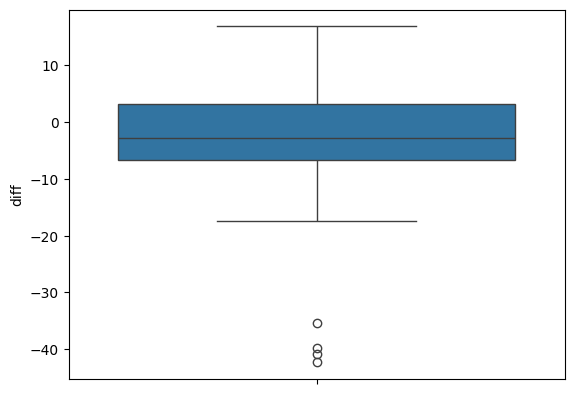

In [33]:
# detect and remove outliers
from scipy import stats
# Calculate z-scores for the 'diff' column
z_scores = stats.zscore(data1['diff'])

# Define a threshold for outlier detection
threshold = 3

# Filter out the outliers
data2 = data1[(z_scores < threshold)]

# Plot the boxplot without outliers
sns.boxplot(y='diff', data=data2)


In [34]:
# 
data3 = data2.query('distance == "80cm"')[["flower_number","area","imagej_area"]]

In [35]:
flower_numbers = data3["flower_number"].unique().tolist()
#flower_numbers

In [36]:
flower_dicts = {}
for flower in flower_numbers:
    flower_temp = flower
    flower_dicts[flower] = np.mean(data3.query(f'flower_number == "{flower_temp}"')["imagej_area"].tolist())

#flower_temp = flower_numbers[0]
#fa = np.mean(data2.query(f'flower_number == "{flower_temp}"')["imagej_area"].tolist())

In [37]:
def getDiff(flower_area, flower_number):
    try:
        return flower_area - flower_dicts[flower_number]
    except:
        return "unknown"

In [38]:
data2['flower_diff'] = data2.apply(lambda x: getDiff(x['area'], x['flower_number']), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_74021/3489814563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['flower_diff'] = data2.apply(lambda x: getDiff(x['area'], x['flower_number']), axis=1)


In [39]:
data2[data2["flower_diff"] != 0]

,area,flower_number,distance,imagej_area,flower_color,morphology,abs_diff,diff,flower_diff
1,4.142760,F11,80cm,3.367735,T5,C3,0.775025,-0.775025,0.775025
3,25.580820,F21,100cm,19.696735,T2,C2,5.884085,-5.884085,5.129248
4,142.773928,F13,80cm,131.586834,T4,C3,11.187094,-11.187094,11.187094
5,23.594120,F21,80cm,20.451572,T2,C2,3.142548,-3.142548,3.142548
6,39.048547,F18,60cm,35.987025,T2,C2,3.061522,-3.061522,7.655061
...,...,...,...,...,...,...,...,...,...
69,96.251402,F7,100cm,89.522402,T3,C2,6.729000,-6.729000,-0.561308
70,13.661164,F5,80cm,18.845124,T1,C1,5.183960,5.183960,-5.18396
71,3.774800,F11,60cm,3.535477,T5,C3,0.239323,-0.239323,0.407065
72,42.386727,F16,100cm,54.606342,T3,C2,12.219615,12.219615,-20.174438


In [40]:
# filter out 80cm, which is the middle measurement or reference and unknonw, which are for the flowers without 80cm measurement
data4 = data2.query(' distance != "80cm" and flower_diff != "unknown" ')

(array([ 2.,  1.,  4.,  4.,  9., 13.,  2.,  2.,  3.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-31.63956806, -25.33651202, -19.03345599, -12.73039995,
         -6.42734392,  -0.12428788,   6.17876816,  12.48182419,
         18.78488023,  25.08793626,  31.3909923 ,  37.69404833,
         43.99710437,  50.3001604 ,  56.60321644,  62.90627247,
         69.20932851,  75.51238454,  81.81544058,  88.11849662,
         94.42155265]),
 <BarContainer object of 20 artists>)

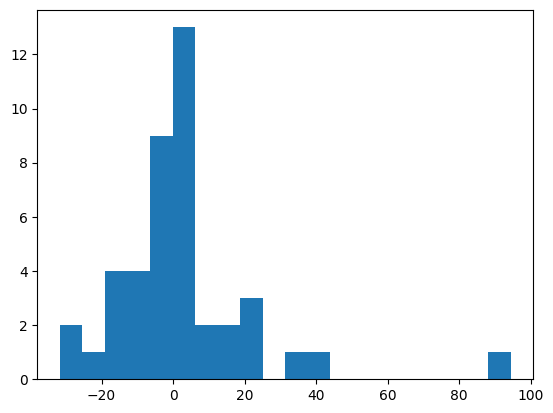

In [41]:
# histogram of distance effect on the same plant
plt.hist(data4["flower_diff"], bins=20)

Text(0.5, 1.0, 'Effect of Distance on Floral Area Estimate (n=20)')

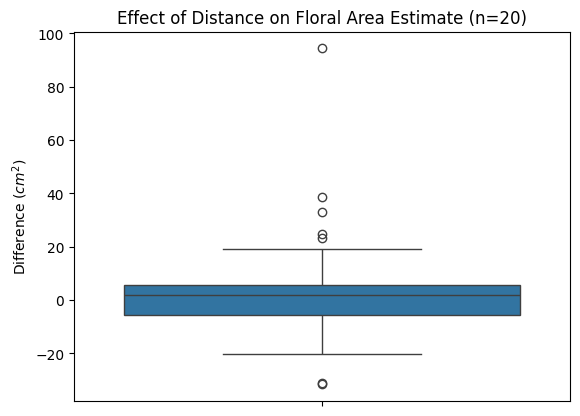

In [49]:
# box plot showing the 
sns.boxplot(data4['flower_diff'])
plt.ylabel("Difference $\\left( cm^2 \\right)$")
plt.title(f"Effect of Distance on Floral Area Estimate (n={len(data4.groupby('flower_number').count())})")

In [43]:
#https://www.statology.org/one-sample-t-test/
#one sample t-test
from scipy import stats
# statistcal test that the mean is 0

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data4['flower_diff'].tolist(), 0)

# Print the t-test result
print("T-Test Result:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)


T-Test Result:
T-statistic: 0.8886023393238691
p-value: 0.3792779394777134


In [50]:
import pandas as pd
import json

# Path to results JSON file
results_path = "/Users/edwardamoah/Documents/GitHub/FloralArea/runs/segment/val2/predictions.json"

# Load JSON results
with open(results_path, 'r') as f:
    data = json.load(f)

# Example: Extract confidence thresholds and F1 scores
f1_scores = data["metrics"]["f1"]  # Replace key with actual structure
confidence_thresholds = data["metrics"]["conf"]
df = pd.DataFrame({"Confidence": confidence_thresholds, "F1-Score": f1_scores})
print(df)


TypeError: list indices must be integers or slices, not str

In [ ]:
from ultralytics import YOLO

# Load a pre-trained or custom YOLOv8 model
model = YOLO('/Users/edwardamoah/Documents/GitHub/FloralArea/runs/segment/train7/weights/best.pt')  # Replace with your model file

# Run evaluation on the validation dataset
metrics = model.val()
